In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

#Q1#
-> Create one csv file that contains all house sales records from five
boroughs over the target years

***Please don't run the following code. It is just a demonstration of the creation of my attached csv file.***

***Please Start from next code cell!!!***

In [ ]:
# Load the Excel files for each borough for 2021, 2022, 2023
bronx2021_data = pd.read_excel('/content/2021_bronx.xlsx')
brooklyn2021_data = pd.read_excel('/content/2021_brooklyn.xlsx')
manhattan2021_data = pd.read_excel('/content/2021_manhattan.xlsx')
queens2021_data = pd.read_excel('/content/2021_queens.xlsx')
staten_island2021_data = pd.read_excel('/content/2021_staten_island.xlsx')

bronx2022_data = pd.read_excel('/content/2022_bronx.xlsx')
brooklyn2022_data = pd.read_excel('/content/2022_brooklyn.xlsx')
manhattan2022_data = pd.read_excel('/content/2022_manhattan.xlsx')
queens2022_data = pd.read_excel('/content/2022_queens.xlsx')
staten_island2022_data = pd.read_excel('/content/2022_staten_island.xlsx')

bronx2023_data = pd.read_excel('/content/2023_bronx.xlsx')
brooklyn2023_data = pd.read_excel('/content/2023_brooklyn.xlsx')
manhattan2023_data = pd.read_excel('/content/2023_manhattan.xlsx')
queens2023_data = pd.read_excel('/content/2023_queens.xlsx')
staten_island2023_data = pd.read_excel('/content/2023_staten_island.xlsx')

# Add a column to each dataframe to identify the borough
bronx2021_data['Borough'] = 'Bronx'
brooklyn2021_data['Borough'] = 'Brooklyn'
manhattan2021_data['Borough'] = 'Manhattan'
queens2021_data['Borough'] = 'Queens'
staten_island2021_data['Borough'] = 'Staten Island'

bronx2022_data['Borough'] = 'Bronx'
brooklyn2022_data['Borough'] = 'Brooklyn'
manhattan2022_data['Borough'] = 'Manhattan'
queens2022_data['Borough'] = 'Queens'
staten_island2022_data['Borough'] = 'Staten Island'

bronx2023_data['Borough'] = 'Bronx'
brooklyn2023_data['Borough'] = 'Brooklyn'
manhattan2023_data['Borough'] = 'Manhattan'
queens2023_data['Borough'] = 'Queens'
staten_island2023_data['Borough'] = 'Staten Island'

# Combine all data into one DataFrame
all_sales_data = pd.concat([
    bronx2021_data, brooklyn2021_data, manhattan2021_data, queens2021_data, staten_island2021_data,
    bronx2022_data, brooklyn2022_data, manhattan2022_data, queens2022_data, staten_island2022_data,
    bronx2023_data, brooklyn2023_data, manhattan2023_data, queens2023_data, staten_island2023_data
])

# Save the combined data to a new CSV file
output_file_path = '/content/all_boroughs_house_sales_2021-2023.csv'
all_sales_data.to_csv(output_file_path, index=False)

output_file_path


-> Perform statistical data exploration to report the 1) statistics of
house price for each borough), 2) types of houses involved in the given dataset, 3)
missing values in the provided dataset.

In [2]:
df = pd.read_csv('/content/all_boroughs_house_sales_2021-2023.csv')
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,BROOKLYN ANNUAL SALES FOR CALENDAR YEAR 2022,NEW YORK CITY DEPARTMENT OF FINANCE,QUEENS ANNUAL SALES FOR CALENDAR YEAR 2022,STATEN ISLAND ANNUAL SALES FOR CALENDAR YEAR 2022,Bronx Rolling Sales. All Sales From January 2023 - December 2023,PTS Sales Data as of 1/9/2024,Brooklyn Rolling Sales. All Sales From January 2023 - December 2023,Manhattan Rolling Sales. All Sales From January 2023 - December 2023,Queens Rolling Sales. All Sales From January 2023 - December 2023,Staten Island Rolling Sales. All Sales From January 2023 - December 2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,23,NaN,A1,408 EAST 179TH STREET,NaN,10457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,10457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,63,NaN,A1,469 EAST 185TH STREET,NaN,10458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BATHGATE,01 ONE FAMILY DWELLINGS,1,3045,12,NaN,A1,2052 BATHGATE AVENUE,NaN,10457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert 'SALE PRICE' to numeric, errors='coerce' will set non-numeric values to NaN
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Group by 'Borough' and calculate statistical summary for 'SALE PRICE'
borough_price_stats = df.groupby('Borough')['SALE PRICE'].describe()

# Listing unique types of houses/buildings
unique_house_types = df['BUILDING CLASS CATEGORY'].unique()

# Checking for missing values in the relevant columns
missing_values = df[['Borough', 'BUILDING CLASS CATEGORY', 'SALE PRICE']].isnull().sum()

# The results can be displayed or used as needed. For instance:
print("Statistical Summary of House Prices by Borough:\n", borough_price_stats)
print("\nUnique House/Building Types:\n", unique_house_types.tolist())
print("\nMissing Values in Relevant Columns:\n", missing_values)


Statistical Summary of House Prices by Borough:
                  count          mean           std  min       25%       50%  \
Borough                                                                       
Bronx          14992.0  8.475194e+05  3.618924e+06  0.0       0.0  357321.0   
Brooklyn       55820.0  1.255236e+06  5.007590e+06  0.0       0.0  636406.0   
Manhattan      22756.0  3.021417e+06  1.566200e+07  0.0  462000.0  965000.0   
Queens         58652.0  1.034585e+06  7.692018e+06  0.0       0.0  411173.5   
Staten Island  18510.0  5.730974e+05  1.485813e+06  0.0       0.0  500000.0   

                     75%           max  
Borough                                 
Bronx           725000.0  1.190000e+08  
Brooklyn       1230000.0  2.567950e+08  
Manhattan      2137500.0  1.033000e+09  
Queens          825000.0  1.760000e+08  
Staten Island   700000.0  5.870000e+07  

Unique House/Building Types:
 [nan, '01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '03 THREE FAMILY DW

Please note that the big amount of missing value in Sale Price column is due to the merge of different data files which have different structures.

Missing values is not random and left by my will to ensure the year and borough structures are not confusing.

# **Q2**



**Proposal 1:**

Has there been a significant increase in the proportion of luxury house sales (defined as sales above a certain high price threshold) in Manhattan in the post-COVID period compared to pre-COVID?

---


**Hypothesis Test:**

*   Null Hypothesis (H0): The proportion of luxury house sales in Manhattan post-COVID is the same as or less than the pre-COVID period.
*   Alternative Hypothesis (H1): The proportion of luxury house sales in Manhattan post-COVID is greater than in the pre-COVID period.

---
**Why well-motivated?**

The luxury real estate market might behave differently than the general market, especially in an area like Manhattan. Analyzing changes in the proportion of luxury sales can reveal trends in high-end market demand.


---


**Test to be performed:**

Z-test for proportions, specifically, we are interested in comparing proportions across two independent groups.



---

 **Factors I consider to make decisions on proposal test 1
to be performed?**



1.   outcome is categorical (luxury vs. non-luxury)
2.    It's suitable for large sample sizes, which is often the case with real estate transaction data like the one I am working at.

**Proposal 2:**

Is there a significant difference in the median house price recovery between Brooklyn and Queens post-COVID?

---


**Hypothesis Test:**

*   Null Hypothesis (H0): There is no significant difference in the median house prices post-COVID between Brooklyn and Queens.
*   Alternative Hypothesis (H1): There is a significant difference in the median house prices post-COVID between Brooklyn and Queens.


---
**Why well-motivated?**

Comparing Brooklyn and Queens, two populous boroughs with diverse housing stocks, can reveal how different market segments are recovering. This can provide insights into borough-specific market dynamics.


---


**Test to be performed: **

 A two-tailed Mann-Whitney U test (non-parametric test) for comparing medians, as it does not assume normal distribution of data and is suitable for median comparison.

---

**Factors I consider to make decisions on proposal test 2
to be performed?**

1.   Real estate prices often do not follow a normal distribution and can be skewed or have outliers. The Mann-Whitney U test does not assume normal distribution and is therefore more appropriate for such data
2.   This test is chosen over parametric alternatives (like the t-test) because it is less sensitive to outliers and skewed distributions, which are common in house price data.
3.   A two-tailed test is used as we are interested in any significant difference in median prices between the two boroughs, not in a specific direction of change.

# Q3

**House Prices:**

I think it is proper to use box plots to visualize the distribution of sale prices for each building class. Box plots are ideal for showing the median, quartiles, and outliers in price data.



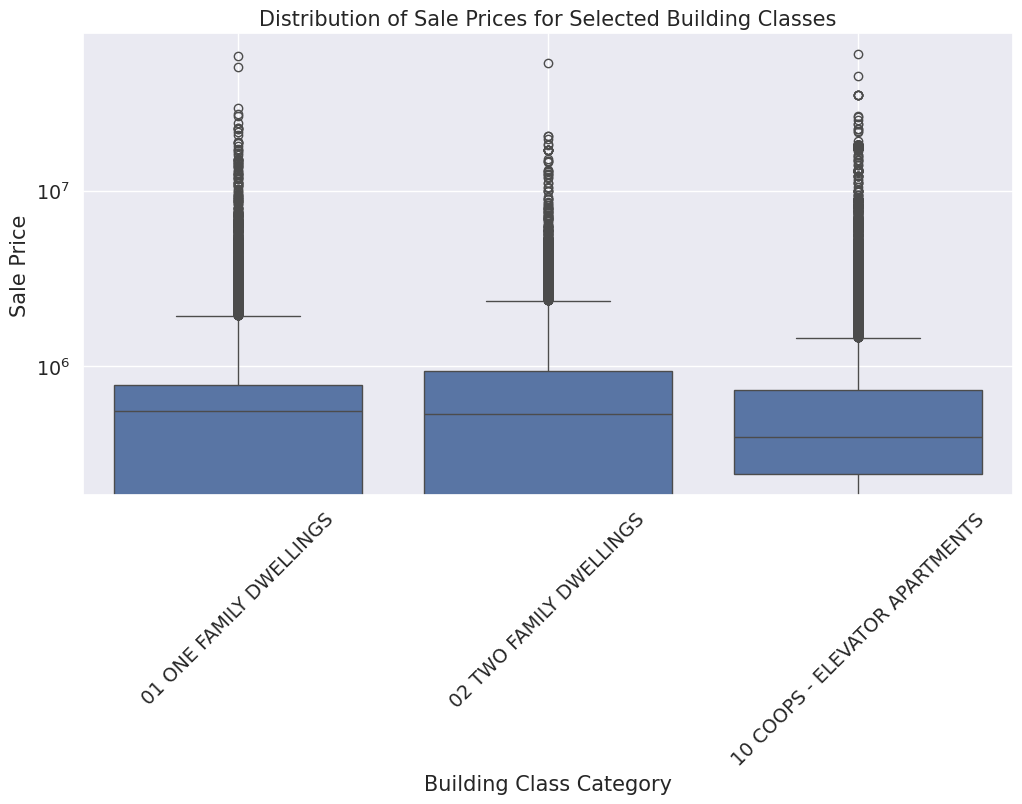

In [4]:
# Selecting three types of houses for analysis
selected_classes = ['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '10 COOPS - ELEVATOR APARTMENTS']

# Filtering the dataframe for the selected classes
df_selected_classes = df[df['BUILDING CLASS CATEGORY'].isin(selected_classes)]

# Creating a box plot for house prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df_selected_classes)
plt.title('Distribution of Sale Prices for Selected Building Classes')
plt.ylabel('Sale Price')
plt.xlabel('Building Class Category')
plt.xticks(rotation=45)
plt.yscale('log')  # Using a log scale due to wide range of prices
plt.grid(True)
plt.show()




**ONE FAMILY DWELLINGS:**

The prices for one-family dwellings show a broad range, indicating diverse property values within this category. The median price is lower compared to the other two categories, suggesting more affordability. The presence of outliers above the upper whisker indicates some high-value sales.

**TWO FAMILY DWELLINGS:**

The price distribution for two-family dwellings is also wide, suggesting diversity in property values. The median price is higher than one-family dwellings, indicating these are generally more expensive. There are outliers on the higher end, indicating some exceptionally high-priced sales.

**COOPS - ELEVATOR APARTMENTS:**

This category shows the most significant variation in prices, with a very wide range of values and numerous outliers. The median price is the highest among the three, reflecting potentially higher value or luxury properties in this segment. The large number of high-value outliers could indicate a segment of very high-end cooperative apartments.

**House Sales:**

It is also presumably proper to create bar charts to compare the number of sales for each building class. Bar charts are effective for comparing quantities across categories


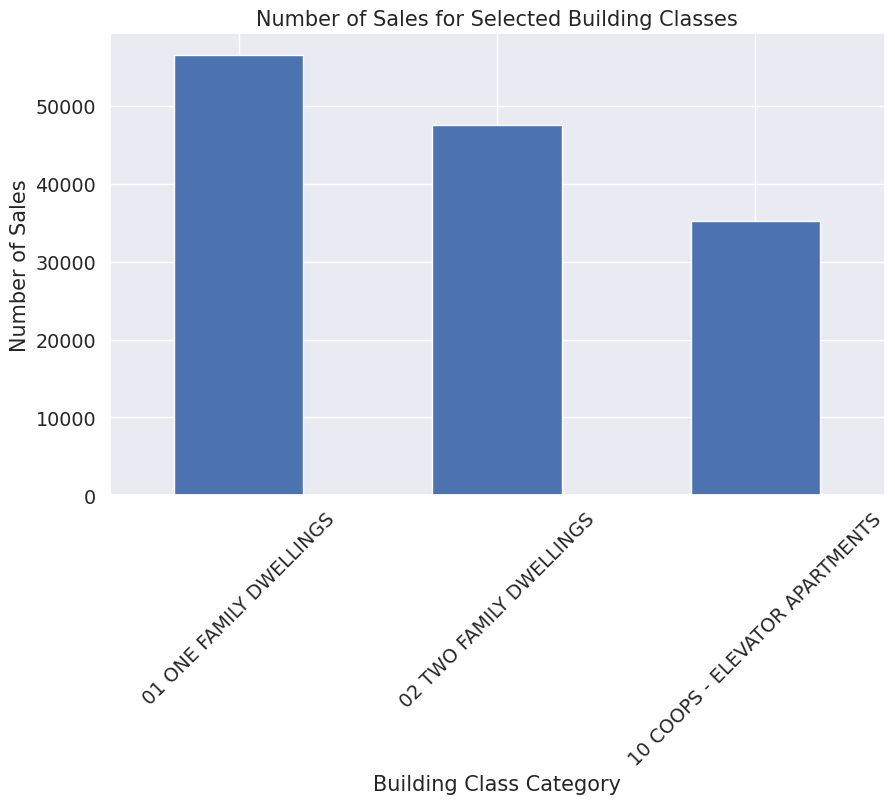

In [5]:
sales_count = df_selected_classes['BUILDING CLASS CATEGORY'].value_counts()

plt.figure(figsize=(10, 6))
sales_count.plot(kind='bar')
plt.title('Number of Sales for Selected Building Classes')
plt.ylabel('Number of Sales')
plt.xlabel('Building Class Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**ONE FAMILY DWELLINGS**

This category has the highest number of sales among the three, indicating a strong market demand or availability. It suggests that one-family dwellings are a popular choice in the housing market.

**TWO FAMILY DWELLINGS:**

The sales volume is lower than one-family dwellings but still significant, reflecting a moderate level of market activity for these types of properties.

**COOPS - ELEVATOR APARTMENTS:**

The number of sales in this category is the lowest among the three, which could be due to higher prices, less availability, or specific market preferences. It suggests that while there is a market for these properties, it is smaller compared to the other two categories.

# Q4

To raise a regression task, I want to make a regression model to predict sale price of one family dwelling in NYC by considering the features 'Borough', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS', 'LAND \nSQUARE FEET','GROSS \nSQUARE FEET', 'YEAR BUILT', which are most presumably relevant features to house price. (Please note that the feature engieering will be simply carried out in this section and further developed in Q5)

---

Data Preparation:

Filters the dataset to include only '01 ONE FAMILY DWELLINGS'.
Removes rows where 'SALE PRICE' is missing.
Selects a set of predictors that are potentially influential for predicting 'SALE PRICE'.
Separates the features (X) and the target variable (y).

---
Preprocessing:

Identifies numeric and categorical features from the dataset.
Creates a pipeline (numeric_transformer) to handle missing values (imputing with median) and scale numeric features.
Creates a pipeline (categorical_transformer) for handling missing values in categorical features (imputing with a placeholder 'missing') and applying one-hot encoding.
Combines these transformers into a ColumnTransformer (named preprocessor), which processes the respective numeric and categorical columns.

---
Data Conversion:

Converts all categorical columns in the dataset to string type to ensure consistency for the one-hot encoding.

---

Model Training and Evaluation:

Splits the data into training and testing sets (80% train, 20% test).
Creates a pipeline combining the preprocessing steps and a linear regression model.
Fits the model to the training data.
Predicts and evaluates the model on the test data, calculating the Root Mean Squared Error (RMSE).

---
Baseline Model Comparison:

Calculates the RMSE for two baseline models – one that always predicts the mean 'SALE PRICE' from the training data and another that always predicts the median 'SALE PRICE'.
These baseline RMSE values provide a comparison to assess the performance of the linear regression model.

---

Model Performance:
Calculates the model's score (R^2) on the training data, which indicates how well the model explains the variability of the target variable.
Prints the predicted 'SALE PRICE' values for the test set.

In [6]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL\nUNITS',
       'COMMERCIAL\nUNITS', 'TOTAL \nUNITS', 'LAND \nSQUARE FEET',
       'GROSS \nSQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS\nAT TIME OF SALE', 'SALE PRICE', 'SALE DATE', 'Borough',
       'BROOKLYN ANNUAL SALES FOR CALENDAR YEAR 2021',
       'MANHATTAN ANNUAL SALES FOR CALENDAR YEAR 2021',
       'QUEENS ANNUAL SALES FOR CALENDAR YEAR 2021',
       'STATEN ISLAND ANNUAL SALES FOR CALENDAR YEAR 2021',
       'BRONX ANNUAL SALES FOR CALENDAR YEAR 2022',
       'BROOKLYN ANNUAL SALES FOR CALENDAR YEAR 2022',
       'NEW YORK CITY DEPARTMENT OF FINANCE',
       'QUEENS ANNUAL SALES FOR CALENDAR YEAR 2022',
       'STATEN ISLAND ANNUAL SALES FOR CALENDAR YEAR 2022',
       'Bronx Rolling Sales.  All Sales From January 2023 - December 2023',
   

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Filtering the dataset for '01 ONE FAMILY DWELLINGS'
df_one_family = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

# Dropping rows where 'SALE PRICE' is NaN
df_one_family = df_one_family.dropna(subset=['SALE PRICE'])

# Selecting potential predictor variables
predictors = ['Borough', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL\nUNITS',
              'COMMERCIAL\nUNITS', 'TOTAL \nUNITS', 'LAND \nSQUARE FEET',
              'GROSS \nSQUARE FEET', 'YEAR BUILT']

# Target variable
target = 'SALE PRICE'

# Preparing the data
X = df_one_family[predictors]
y = df_one_family[target]


Notice that in the previous question, I discover a lot of missing values in the dataset including sales price feature. To predict sales price, I have to handle the missing values otherwise the model won't work. I think imputation will fine for this dataset.

In [44]:
# Handling missing values and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Converting all categorical columns to strings
X[categorical_features] = X[categorical_features].astype(str)


All set, Let me use Linear Regression to start up prediction.

In [47]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=42)

# Creating a pipeline with preprocessing and linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fitting the model
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  1013365.0003617153


In [48]:
# Calculating RMSE for the Mean-Based Model
y_train_mean = y_train.mean()
y_pred_mean_baseline = np.full(shape=y_test.shape, fill_value=y_train_mean)
mse_mean_baseline = mean_squared_error(y_test, y_pred_mean_baseline)
rmse_mean_baseline = np.sqrt(mse_mean_baseline)

# Calculating RMSE for the Median-Based Model
y_train_median = y_train.median()
y_pred_median_baseline = np.full(shape=y_test.shape, fill_value=y_train_median)
mse_median_baseline = mean_squared_error(y_test, y_pred_median_baseline)
rmse_median_baseline = np.sqrt(mse_median_baseline)

rmse_mean_baseline, rmse_median_baseline


(894576.8116852902, 894756.4560315957)

In [13]:
model.score(X_train, y_train)


0.9216622158670925

This R-square score is pretty satisfying though both the mean and median baseline models have lower RMSEs compared to your regression model.

In [14]:
print(y_pred)

[ 962632.87600949  729191.05235111  868345.68782596 ... -111290.57584718
  324609.32275575  -66280.96066326]


Let's take a look of the visualization real vs prediction

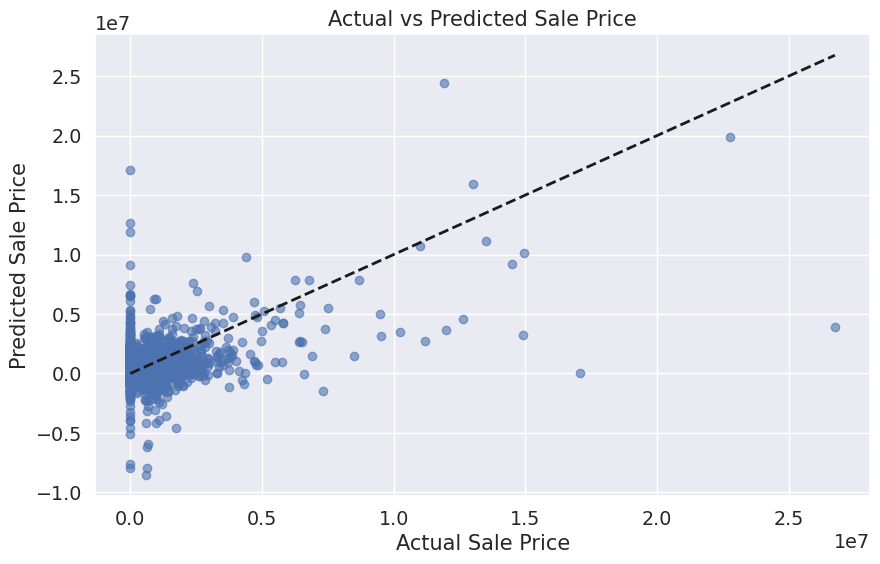

In [15]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect prediction
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()


# Q5

To examine if multicollinearity exists in selected features, I should remove all the missing values and conert coloumns to appropriate types.
The annual sales features seem very useless and misleading to the multicollinearity test as they are just sum of the corresponding sales which are certainly correlated but have nothing to do with our analysis!

Missing values can skew results and affect model performance. I dropped rows with missing values in key columns like 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE'. For numeric columns, I imputed missing values with the median, which is robust to outliers.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Corrected column names with newline characters
selected_columns = [
    'Borough', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE',
    'RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS',
    'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT'
]

# Narrowing down to selected features
df_selected = df[selected_columns]

# Handling missing values
df_selected = df_selected.dropna()


Next job is to convert columns like 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', etc., to numeric types, handling non-numeric entries. This ensures that the model correctly interprets these features as quantitative data.

In [19]:
# Converting numeric columns (handling non-numeric entries and fill missing values)
numeric_cols = ['RESIDENTIAL\nUNITS', 'COMMERCIAL\nUNITS', 'TOTAL \nUNITS',
                'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT']
for col in numeric_cols:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')
    df_selected[col].fillna(df_selected[col].median(), inplace=True)


For categorical variables ('Borough', 'NEIGHBORHOOD', etc.), I applied label encoding, which involves converting each category to a unique integer. This is essential as most regression models can only interpret numerical data.

In [21]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Borough', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE']

# Converting categorical columns to string to ensure consistent data types
for col in categorical_cols:
    df_selected[col] = df_selected[col].astype(str)
for col in categorical_cols:
    df_selected[col] = label_encoder.fit_transform(df_selected[col])


I want to use a heatmap to visualize correlations between features. High correlation between two features indicates multicollinearity

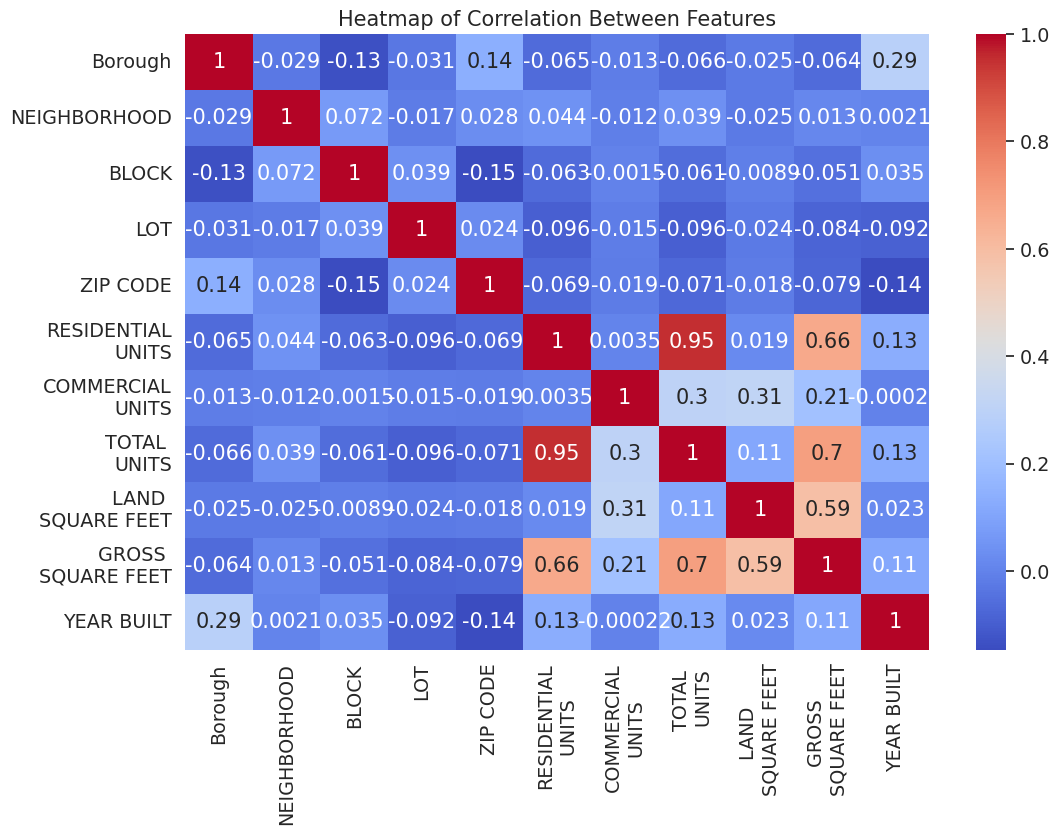

In [22]:
# Checking for multicollinearity using heatmap
correlation_matrix = df_selected.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Between Features")
plt.show()


I want to use VIF method to have an overview of the multicollinearity of the entire dataset with respect to the specific neighborhoods.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding a constant for VIF calculation
vif_data = add_constant(df_selected)

# Calculating VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Displaying the VIF for each feature
vif.sort_values(by="VIF", ascending=False)


,Feature,VIF
6,RESIDENTIAL\nUNITS,inf
7,COMMERCIAL\nUNITS,inf
8,TOTAL \nUNITS,inf
0,const,4610.499190
10,GROSS \nSQUARE FEET,4.436604
9,LAND \nSQUARE FEET,2.529339
11,YEAR BUILT,1.169299
1,Borough,1.163670
5,ZIP CODE,1.079978
3,BLOCK,1.055947


The infinite VIF values for 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', and 'TOTAL UNITS' suggest that these features are perfectly multicollinear with each other. This is likely because 'TOTAL UNITS' is a derivative of 'RESIDENTIAL UNITS' and 'COMMERCIAL UNITS'. Even though it does not show valueable outcome, it verifies my dataset is integrated well and no anomalies.

'LAND SQUARE FEET' and 'GROSS SQUARE FEET' have moderate VIF values, indicating some level of multicollinearity but not enough to be overly concerning.

# Q6

Notice that it is required to use the preprocessed data for model A, not apply feature engineering for model B as compare.

Other than Linear Regression I just did, I want to process model A and B by XGBoost Regression.

To ensure I use the same set of training data/testing data, I will set my goal of prediction by focusing on ONE FAMILY DWELLINGS.

In [25]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

df_one_family = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']


Because of the setting of preprocessor, after some errors emerged due to the exclusion of two features (explain below), I decide to process model B ahead of model A so that no conflicts could be drawn.

In [49]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

df_one_family = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

predictors = ['Borough', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL\nUNITS',
              'COMMERCIAL\nUNITS', 'TOTAL \nUNITS', 'LAND \nSQUARE FEET',
              'GROSS \nSQUARE FEET', 'YEAR BUILT']
target = 'SALE PRICE'

df_one_family_clean = df_one_family.dropna(subset=['SALE PRICE'])

X_B = df_one_family_clean[predictors]
y_B = df_one_family_clean['SALE PRICE']

X_B[categorical_features] = X_B[categorical_features].astype(str)

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, train_size=0.8, test_size=0.2, random_state=42)

model_B = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', XGBRegressor())])

model_B.fit(X_train_B, y_train_B)

y_pred_B = model_B.predict(X_test_B)
mse_B = mean_squared_error(y_test_B, y_pred_B)
rmse_B = np.sqrt(mse_B)

rmse_B

829594.683726406

In [50]:
model_B.score(X_train_B, y_train_B)

0.7451616150581601

In Q5, I discover 'Total Unit' is infinitely collinear with residential and commercial units. I think drop residential and commercial unit will improve the performance of the model

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Convert 'SALE PRICE' to numeric and filter for '01 ONE FAMILY DWELLINGS'
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df_one_family = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

# Updated list of predictors
predictors = ['Borough', 'NEIGHBORHOOD', 'BLOCK', 'LOT', 'ZIP CODE', 'TOTAL \nUNITS',
              'LAND \nSQUARE FEET', 'GROSS \nSQUARE FEET', 'YEAR BUILT']
target = 'SALE PRICE'

# Dropping rows with missing sale price and selecting predictors and target
df_one_family_clean = df_one_family.dropna(subset=[target])
X_A = df_one_family_clean[predictors]
y_A = df_one_family_clean[target]

# Converting all categorical features to string
categorical_features = X_A.select_dtypes(include=['object']).columns
for col in categorical_features:
    X_A[col] = X_A[col].astype(str)

# Determining numeric and categorical features from the updated dataset
numeric_features = X_A.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_A.select_dtypes(include=['object']).columns

# Defining numeric and categorical transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Train-test split
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, train_size=0.8, test_size=0.2, random_state=42)

# Model pipeline
model_A = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', XGBRegressor())])

# Fit the model
model_A.fit(X_train_A, y_train_A)

# Predict and evaluate
y_pred_A = model_A.predict(X_test_A)
mse_clean = mean_squared_error(y_test_A, y_pred_A)
rmse_clean = np.sqrt(mse_clean)

print(rmse_clean)




827193.7508416849


In [39]:
model_A.score(X_train_A, y_train_A)

0.7443372638763166

**RMSE (Root Mean Squared Error):**

Model A (feature engineered) RMSE: 827193.7508416849

Model B (without f.e.) RMSE: 829594.683726406

A lower RMSE value indicates a model that better fits the data. In this case, Model A has a lower RMSE, suggesting it's making more accurate predictions on the test set compared to Model B.

---
**R-squared (Score):**

Model A (feature engineered) Score: 0.7443372638763166

Model B (without f.e) Score: 0.7451616150581601

The R-squared value indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Model B has a higher R-squared value, suggesting it is better at explaining the variance in your target variable.



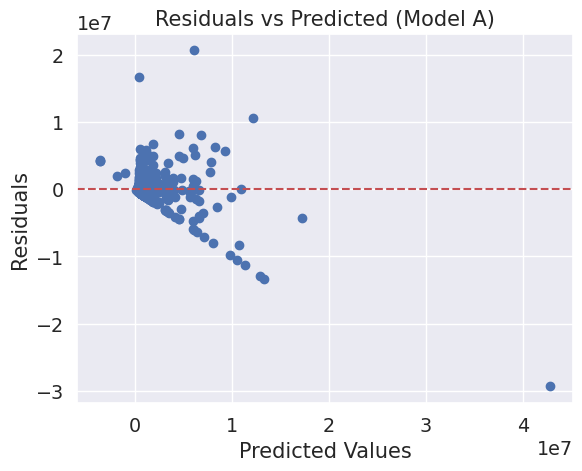

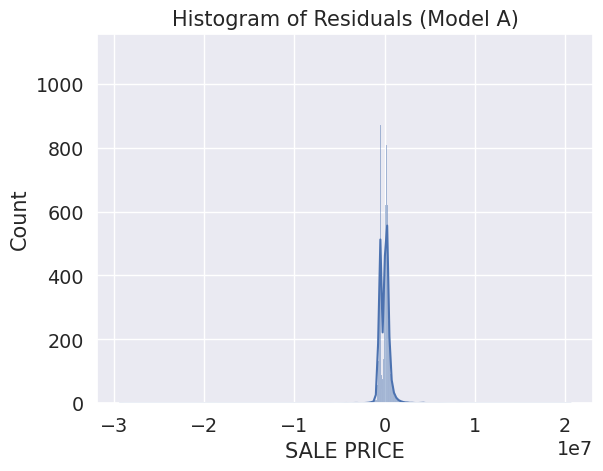

In [51]:
import scipy.stats as stats

# Calculate residuals for both models
residuals_A = y_test_A - y_pred_A
residuals_B = y_test_B - y_pred_B

# Plotting residuals vs predicted values for Model A
plt.scatter(y_pred_A, residuals_A)
plt.title('Residuals vs Predicted (Model A)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histogram of residuals for Model A
sns.histplot(residuals_A, kde=True)
plt.title('Histogram of Residuals (Model A)')
plt.show()


**Model A:**

The plot shows a pattern where the residuals are not randomly scattered around the zero line, particularly for higher predicted values. This indicates that the model may be performing poorly for higher-valued homes or could be facing issues with heteroscedasticity, where the variance of residuals is not constant.

The residuals are not normally distributed, as shown by the sharp peak and long tails. This indicates that the model has a systematic bias, particularly in underestimating or overestimating certain price ranges.

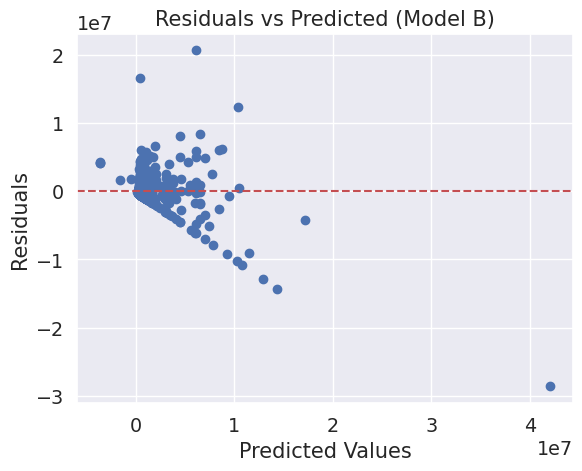

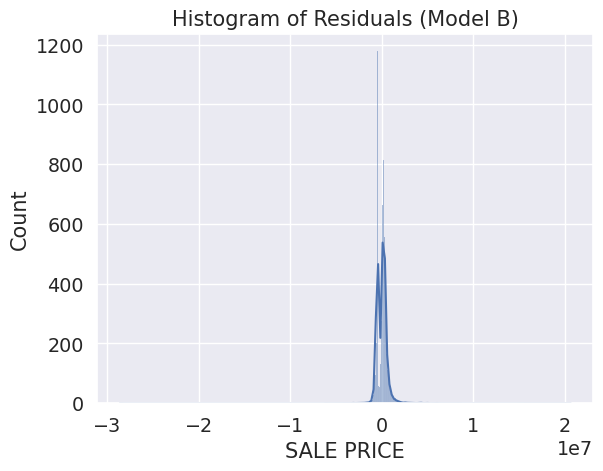

In [52]:
# Plotting residuals vs predicted values for Model B
plt.scatter(y_pred_B, residuals_B)
plt.title('Residuals vs Predicted (Model B)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Histogram of residuals for Model B
sns.histplot(residuals_B, kde=True)
plt.title('Histogram of Residuals (Model B)')
plt.show()

**Model B:**

This plot also exhibits a pattern with residuals not centered around zero, especially for higher predicted values. Similar to Model A, Model B seems to struggle with higher-valued properties/

Like Model A, the residuals for Model B are also normally distributed. The distribution has a sharp peak, suggesting that while the model may make accurate predictions around the mode, it fails to capture the full range of data.

**Conclusion:**

Model A and B have an improvement of rmse performance but rather limited, however, compared to Q4 model in Linear Regression, it is rather a big improvement.